# 家計調査分析
### データソース
#### ➌は機械学習用に使うの決定。➊or➋どちらを使うか？
##### ➊かなぁ。➋は使いにくい。有用なので紹介はしたい。

- ➊毎月の家計調査 https://www.stat.go.jp/data/kakei/longtime/csv/h-mon-a.csv
- ➋家計調査ビッグデータ　https://www.meti.go.jp/statistics/bigdata-statistics/bigdata_pj_2019/pos_gfk_intage.html
- ➌一般ミクロデータ　https://www.nstac.go.jp/services/ippan-microdata.html

- まずは➊をread_csvを使って読み込んでみます。

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("https://www.stat.go.jp/data/kakei/longtime/csv/h-mon-a.csv")
df.head()

,<html><head><title>Request Rejected</title></head><body>The requested URL was rejected. Please consult with your administrator.<br><br>Your support ID is: 6133672767624010889</body></html>


### リクエストが拒否され、読み込まれません
- ひとまずできなかった場合、何回か検索ワードを変更して調べてみましょう。
- reqeuests rejected read csv pandas で有望なのが出てくる
- requests_htmlを使ってやってみます

In [3]:
from requests_html import HTMLSession

In [4]:
session = HTMLSession()
r = session.get("https://www.stat.go.jp/data/kakei/longtime/csv/h-mon-a.csv")
print(r.status_code)

200


In [6]:
r.text[:500]

'\x93ñ\x90l\x88È\x8fã\x82Ì\x90¢\x91Ñ_\x8ex\x8fo\x8bà\x8az[\x89~],,,,,,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144'

### テキストを見る
- 文字化けしている部分がある
- 数値は表示されている
- エンコードを変えると良いかと推測される

In [7]:
# まずエンコードを調べる

print(r.encoding)

ISO-8859-1


In [10]:
# まずはutf-8を試す
r.encoding = "utf-8"
r.text[:500]

'��l�ȏ�̐���_�x�o���z[�~],,,,,,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145'

In [11]:
# 次にshift-jisを試す
r.encoding = "shift-jis"
r.text[:500]

'二人以上の世帯_支出金額[円],,,,,,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147'

In [14]:
# StringIOを使ってcsvファイルを読み込む

from io import StringIO


df = pd.read_csv(StringIO(r.text))

In [15]:
df.head()

,二人以上の世帯_支出金額[円],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,1,2,3,4,...,236,237,238,239,240,241,242,243,244,245
0,NaN,NaN,NaN,NaN,NaN,NaN,2000年,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020年,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,(平成12年),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,(令和2年),NaN,NaN,NaN,NaN
2,表側連番,階層,大分類,中分類,小分類,品目分類,1月,2月,3月,4月,...,8月,9月,10月,11月,12月,1月,2月,3月,4月,5月
3,1,-,-,-,-,世帯数分布(抽出率調整),10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
4,2,-,-,-,-,集計世帯数,7887,7942,7934,7922,...,7479,7517,7470,7466,7481,7443,7475,7489,7534,7430


# 次にデータセットを作り替える
- 品目分類を持つ
    - 日付は0，1, 2行目にある
- 年月の日付を持つデータを作る

In [17]:
# スライスを使って西暦だけ取得する
df.iloc[0, :]

二人以上の世帯_支出金額[円]      NaN
Unnamed: 1           NaN
Unnamed: 2           NaN
Unnamed: 3           NaN
Unnamed: 4           NaN
                   ...  
241                2020年
242                  NaN
243                  NaN
244                  NaN
245                  NaN
Name: 0, Length: 251, dtype: object

In [18]:
df.iloc[0, :].keys()

Index(['二人以上の世帯_支出金額[円]', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', '1', '2', '3', '4',
       ...
       '236', '237', '238', '239', '240', '241', '242', '243', '244', '245'],
      dtype='object', length=251)

In [20]:
df.iloc[0, :].values

array([nan, nan, nan, nan, nan, nan, '2000年', nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, '2001年', nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, '2002年', nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, '2003年', nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, '2004年', nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, '2005年', nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, '2006年', nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, '2007年', nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, '2008年', nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, '2009年', nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, '2010年', nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, '2011年', nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, '2012年', nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, '2013年', nan, nan, nan, nan, nan,
      

In [23]:
# dropnaメソッドを使ってデータにある西暦を取得する
df.iloc[0, :].dropna().values

array(['2000年', '2001年', '2002年', '2003年', '2004年', '2005年', '2006年',
       '2007年', '2008年', '2009年', '2010年', '2011年', '2012年', '2013年',
       '2014年', '2015年', '2016年', '2017年', '2018年', '2019年', '2020年'],
      dtype=object)

In [26]:
# 月の最後を取得
# まずは月のデータをすべて取得する
df.iloc[2, :]

二人以上の世帯_支出金額[円]    表側連番
Unnamed: 1           階層
Unnamed: 2          大分類
Unnamed: 3          中分類
Unnamed: 4          小分類
                   ... 
241                  1月
242                  2月
243                  3月
244                  4月
245                  5月
Name: 2, Length: 251, dtype: object

In [27]:
# 最後は-1を使うと取れる
df.iloc[2, -1]

' 5月'

In [28]:
# 文字列を数値のみとする
int(df.iloc[2, -1])

ValueError: invalid literal for int() with base 10: ' 5月'

In [29]:
int(df.iloc[2, -1].replace("月", ""))

5

In [33]:
# 西暦と最後の月を変数に代入する
# 西暦も数値にする

seireki = df.iloc[0, :].dropna().values
seireki = [int(year.replace("年", "")) for year in seireki]

latest_month = int(df.iloc[2, -1].replace("月", ""))

print(seireki)
print(latest_month)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
5


In [34]:
# 日付を作る

month_count = (len(seireki) - 1) * 12 + latest_month

print(month_count)

245


In [42]:
pd.date_range("2000-01", freq="M", periods=month_count)

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
               '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31'],
              dtype='datetime64[ns]', length=245, freq='M')

In [44]:
df_date = pd.date_range("2000-01", freq="M", periods=month_count)

# 次にデータセットの必要な部分だけ切り抜きます

- 必要なのは品目分類と数値です

In [45]:
df.iloc[3:, 5:]

,Unnamed: 5,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
3,世帯数分布(抽出率調整),10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
4,集計世帯数,7887,7942,7934,7922,7928,7917,7907,7908,7917,...,7479,7517,7470,7466,7481,7443,7475,7489,7534,7430
5,世帯人員(人),3.32,3.32,3.32,3.32,3.31,3.31,3.31,3.31,3.31,...,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96
6,18歳未満人員(人),0.74,0.75,0.75,0.75,0.75,0.74,0.74,0.74,0.74,...,0.57,0.58,0.58,0.58,0.58,0.58,0.58,0.57,0.58,0.58
7,65歳以上人員(人),0.52,0.53,0.53,0.52,0.52,0.53,0.54,0.53,0.53,...,0.83,0.82,0.82,0.82,0.82,0.82,0.83,0.86,0.86,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,会費・つきあい費,1561,1441,1495,1888,1683,1585,1566,1390,1297,...,707,802,710,776,860,770,705,690,751,696
184,その他の教養娯楽,7063,6370,8068,8109,8822,6858,7033,7995,6681,...,9456,9369,8284,9152,12570,8239,7674,8995,8603,9612
185,消費支出(再掲),309621,290663,335341,335276,308566,297648,326480,309993,296457,...,296327,300609,279671,278765,321380,287173,271735,292214,267922,252017
186,基礎的支出,184372,170045,186202,173441,177153,169779,180853,179332,166901,...,170031,166350,159195,160265,190600,167873,157888,170401,159426,156494


In [49]:
# データをdf1に代入し、indexに品目分類(Unnamed: 5)を、コラムに日付を設定します
df1 = df.iloc[3:, 5:]
df1.index = df1["Unnamed: 5"]
df1 = df1.loc[:, "1":]
df1.columns = df_date
df1.head()

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
Unnamed: 5,,,,,,,,,,,,,,,,,,,,,
世帯数分布(抽出率調整),10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
集計世帯数,7887,7942,7934,7922,7928,7917,7907,7908,7917,7937,...,7479,7517,7470,7466,7481,7443,7475,7489,7534,7430
世帯人員(人),3.32,3.32,3.32,3.32,3.31,3.31,3.31,3.31,3.31,3.3,...,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96
18歳未満人員(人),0.74,0.75,0.75,0.75,0.75,0.74,0.74,0.74,0.74,0.73,...,0.57,0.58,0.58,0.58,0.58,0.58,0.58,0.57,0.58,0.58
65歳以上人員(人),0.52,0.53,0.53,0.52,0.52,0.53,0.54,0.53,0.53,0.54,...,0.83,0.82,0.82,0.82,0.82,0.82,0.83,0.86,0.86,0.85


In [54]:
# 
df1.index.names

FrozenList(['Unnamed: 5'])

In [56]:
# 見栄えが悪いので消しておく

df1.index.names = [""]
df1.head()

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
,,,,,,,,,,,,,,,,,,,,,
世帯数分布(抽出率調整),10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
集計世帯数,7887,7942,7934,7922,7928,7917,7907,7908,7917,7937,...,7479,7517,7470,7466,7481,7443,7475,7489,7534,7430
世帯人員(人),3.32,3.32,3.32,3.32,3.31,3.31,3.31,3.31,3.31,3.3,...,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96
18歳未満人員(人),0.74,0.75,0.75,0.75,0.75,0.74,0.74,0.74,0.74,0.73,...,0.57,0.58,0.58,0.58,0.58,0.58,0.58,0.57,0.58,0.58
65歳以上人員(人),0.52,0.53,0.53,0.52,0.52,0.53,0.54,0.53,0.53,0.54,...,0.83,0.82,0.82,0.82,0.82,0.82,0.83,0.86,0.86,0.85


In [59]:
# 時系列をインデックスに持つよう転移する
df2 = df1.T

In [67]:
pd.set_option("max_columns", 300)
df2

,世帯数分布(抽出率調整),集計世帯数,世帯人員(人),18歳未満人員(人),65歳以上人員(人),うち無職者人員(人),有業人員(人),世帯主の年齢(歳),持家率(％),家賃・地代を支払っている世帯の割合(％),消費支出,食料,穀類,米,パン,麺類,他の穀類,魚介類,生鮮魚介,塩干魚介,魚肉練製品,他の魚介加工品,肉類,生鮮肉,加工肉,乳卵類,牛乳,乳製品,卵,野菜・海藻,生鮮野菜,乾物・海藻,大豆加工品,他の野菜・海藻加工品,果物,生鮮果物,果物加工品,油脂・調味料,油脂,調味料,菓子類,調理食品,主食的調理食品,他の調理食品,飲料,茶類,コーヒー・ココア,他の飲料,酒類,外食,一般外食,学校給食,住居,家賃地代,設備修繕・維持,設備材料,工事その他のサービス,光熱・水道,電気代,ガス代,他の光熱,上下水道料,家具・家事用品,家庭用耐久財,家事用耐久財,冷暖房用器具,一般家具,室内装備・装飾品,寝具類,家事雑貨,家事用消耗品,家事サービス,被服及び履物,和服,洋服,男子用洋服,婦人用洋服,子供用洋服,シャツ・セーター類,男子用シャツ・セーター類,婦人用シャツ・セーター類,子供用シャツ・セーター類,下着類,男子用下着類,婦人用下着類,子供用下着類,生地・糸類,他の被服,履物類,被服関連サービス,保健医療,医薬品,健康保持用摂取品,保健医療用品・器具,保健医療サービス,交通・通信,交通,自動車等関係費,自動車等購入,自転車購入,自動車等維持,通信,教育,授業料等,教科書・学習参考教材,補習教育,教養娯楽,教養娯楽用耐久財,教養娯楽用品,書籍・他の印刷物,教養娯楽サービス,宿泊料,パック旅行費,月謝類,他の教養娯楽サービス,その他の消費支出,諸雑費,理美容サービス,理美容用品,身の回り用品,たばこ,他の諸雑費,こづかい(使途不明),交際費,贈与金,他の交際費,仕送り金,財・サービス支出計,財(商品),耐久財,半耐久財,非耐久財,サービス,食料(財・サービス),非耐久財(食料),サービス(食料),住居(財・サービス),耐久財(住居),半耐久財(住居),サービス(住居),家具・家事用品(財・サービス),耐久財(家具・家事用品),半耐久財(家具・家事用品),非耐久財(家具・家事用品),サービス(家具・家事用品),被服及び履物(財・サービス),半耐久財(被服及び履物),サービス(被服及び履物),保健医療(財・サービス),耐久財(保健医療),半耐久財(保健医療),非耐久財(保健医療),サービス(保健医療),交通・通信(財・サービス),耐久財(交通・通信),半耐久財(交通・通信),非耐久財(交通・通信),サービス(交通・通信),教育(財・サービス),非耐久財(教育),サービス(教育),教養娯楽(財・サービス),耐久財(教養娯楽),半耐久財(教養娯楽),非耐久財(教養娯楽),サービス(教養娯楽),諸雑費(財・サービス),耐久財(諸雑費),半耐久財(諸雑費),非耐久財(諸雑費),サービス(諸雑費),調整集計世帯数,教養娯楽関係費,耐久財(教養娯楽関係費),他の教養娯楽関係費,読書,聴視・観覧,旅行,スポーツ,月謝,会費・つきあい費,その他の教養娯楽,消費支出(再掲),基礎的支出,選択的支出
2000-01-31,10000,7887,3.32,0.74,0.52,0.41,1.51,52.4,76,22.1,309621,73580,6100,2338,2127,1325,310,8525,5479,1370,819,858,6229,5144,1085,3390,1590,1114,686,8029,4702,741,1250,1336,2866,2660,205,2897,264,2633,6290,7377,2945,4431,2918,857,578,1483,3004,15955,14773,1181,16559,11218,5342,1081,4261,24956,11096,7008,2119,4733,9805,3099,1689,959,451,955,975,2301,1586,890,19602,1175,8840,2743,4924,1173,3767,1139,2314,314,1520,506,818,196,287,1470,1653,891,10941,1829,533,2594,5986,31386,6665,15473,3923,215,11335,9247,12532,9406,281,2845,31681,4296,7148,4304,15932,2194,3703,3791,6245,78579,19157,3090,3175,2137,1137,9618,21858,31052,27343,3709,6512,250199,148374,15458,30316,102601,101824,73580,57625,15955,16559,875,205,15479,9805,4065,3264,1586,890,19602,18712,891,10941,1123,422,3410,5986,31386,4435,1025,3876,22049,12532,281,12251,31681,4163,4624,6818,16075,19157,797,2064,4047,12249,736445,34008,3912,30096,4304,2049,8876,3001,3241,1561,7063,309621,184372,125248
2000-02-29,10000,7942,3.32,0.75,0.53,0.41,1.51,52.6,76.3,22,290663,73309,6915,2919,2329,1359,308,8627,5475,1500,802,850,6449,5242,1208,3650,1678,1200,772,8570,5102,744,1298,1427,3168,3001,167,3111,272,2838,6452,7465,2996,4469,3025,856,610,1558,3203,12673,11472,1201,18454,11266,7189,1858,5331,25678,10973,7456,2640,4609,9208,2664,1328,690,647,985,836,2073,1812,838,14400,954,6107,1927,3386,793,2565,786,1543,235,1308,431,731,145,268,1131,1238,830,11789,1995,537,2361,6896,31041,5563,16982,5073,181,11728,8496,14481,11411,220,2849,29737,3191,6255,4586,15705,1392,4929,3833,5552,62565,18800,2839,3402,2603,1133,8823,20078,16061,12340,3721,7625,246898,146773,15010,24781,106981,100125,73309,60636,12673,18454,1571,286,16597,9208,3374,3184,1812,838,14400,13571,830,11789,853,443,3597,6896,31041,5455,887,3856,20843,14481,220,14260,29737,3026,3937,6892,15882,18800,731,2473,4291,11306,735391,32103,2920,29183,4586,2199,9058,2200,3329,1441,6370,290663,170045,120618
2000-03-31,10000,7934,3.32,0.75,0.53,0.41,1.51,52.7,76.2,22.6,335341,79726,7496,3226,2492,1482,296,9268,5880,1613,794,981,6483,5170,1314,3940,1835,1300,804,9268,5630,841,1311,1487,3270,3111,159,3262,308,2954,7216,8050,3287,4762,3496,1038,673,1784,3722,14255,13552,702,18401,11473,6928,1261,5667,25333,10716,7591,2214,4812,11053,3536,1964,574,998,896,1207,2553,2001,860,18366,335,8528,2847,4686,995,3272,885,2071,317,1317,372,765,181,308,1244,2170,1192,11767,2135,743,2425,6464,39097,7076,23076,8274,457,14346,8945,17709,12545,1100,4064,36010,4409,8561,4858,18182,1671,6593,4156,5762,77880,22685,3380,3916,2855,1255,11279,21286,21913,18243,3670,11996,280147,166943,20487,31204,115252,113203,79726,65471,14255,18401,87

## plotly.expressを用いて可視化する
- plotly.expressはデータフレームと列名などを渡すことによりデータを可視化できる

In [64]:
import plotly.express as px

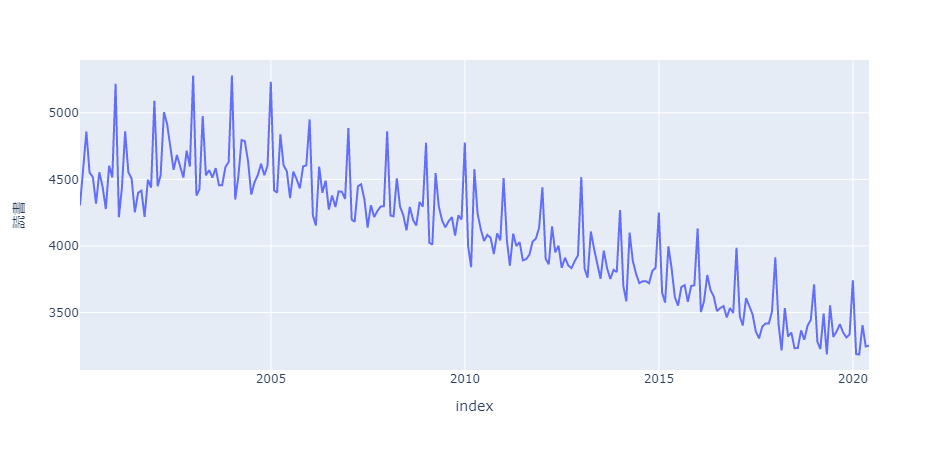

In [66]:
# 1つのデータを可視化する場合
px.line(df2, x=df2.index, y="読書")

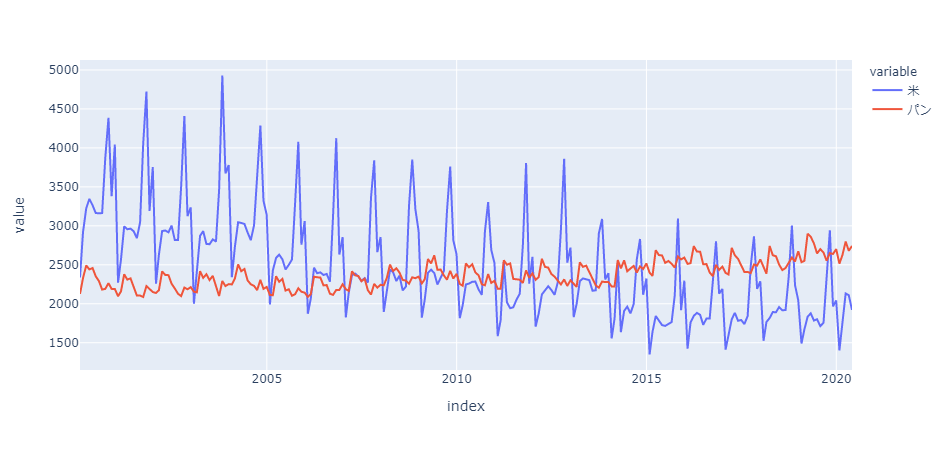

In [70]:
px.line(df2, x=df2.index, y=["米", "パン"])

# たくさんの系統があるデータをいちいち列名を変えてみるのは面倒
- dashを使うとそのようなツールが簡単に作れる

In [76]:
from jupyter_dash import JupyterDash
import dash_core_components as dcc 
import dash_html_components as html
from dash.dependencies import Input, Output

In [78]:
app = JupyterDash(__name__)

app.layout = html.Div([
    
    dcc.Dropdown(
        id = "my_dropdown",
        options = [{"label": col, "value": col} for col in df2.columns],
        value = df2.columns[10]
    ),
    
    dcc.Graph(id="my_graph")
    
])

@app.callback(Output("my_graph", "figure"), [Input("my_dropdown", "value")])
def update_graph(selected_value):
    return px.line(df2, x=df2.index, y=selected_value)


app.run_server(mode="inline")

In [80]:
app = JupyterDash(__name__)

app.layout = html.Div([
    
    dcc.Dropdown(
        id = "my_dropdown",
        options = [{"label": col, "value": col} for col in df2.columns],
        value = [df2.columns[10]],
        multi=True
    ),
    
    dcc.Graph(id="my_graph")
    
])

@app.callback(Output("my_graph", "figure"), [Input("my_dropdown", "value")])
def update_graph(selected_value):
    return px.line(df2, x=df2.index, y=selected_value)


app.run_server(mode="inline")

# マイクロデータの読み込みと

In [ ]:
micro = pd.read_csv("../ippan-microdata/")